 Developing a model on imbalanced data is problematic as the model could be biased and inaccurate. It is therefore important to make the data more balanced before estimating a model. 
 
 In this notebook, we will scrutinize the effect of different sampling methods (under-sampling, over-sampling, SMOTE and ADASYN) on the performance of a Linear support vector classification model. 

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC


import os
print(os.listdir("../input"))

['train.csv', 'sample_submission.csv', 'test.csv']


In [18]:
df=pd.read_csv('../input/train.csv')

The imbalenced dataset that was chosen for this test, is the Santander Customer Transaction dataset. The target value of this dataset is a boolean indicating whether a certain transaction took place. As these transactions are quite rare, the dataset is highly imbalanced.

Text(0.5, 1.0, 'Class Distributions \n (0: No Transaction || 1: Transaction)')

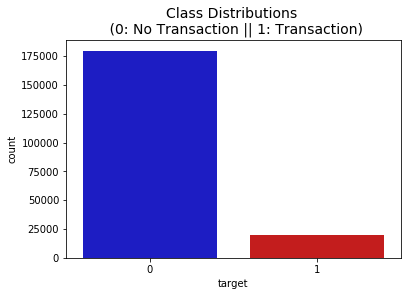

In [19]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('target', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Transaction || 1: Transaction)', fontsize=14)

In [20]:
print('No Transaction', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Transaction', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Transaction 89.95 % of the dataset
Transaction 10.05 % of the dataset


# PCA
The original dataset contains 200 explanatory variables. As it is not the goal of this notebook to create the optimal model and to decrease calculation time , it was decided to decrease the dimensionality of the dataset considerably. 

In the end, the dimensionality was reduced to 2 dimensions as this makes the visualization of the output more straightforward.

In [21]:
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
X=df.drop('ID_code', axis=1)
y = df['target']
X = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(data = X_pca)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### Splitting the data

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Transaction', round(df['target'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Transaction', round(df['target'].value_counts()[1]/len(df) * 100,2), '% of the dataset')



sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    Xtrain_pca, Xtest_pca = X_pca_df.iloc[train_index], X_pca_df.iloc[test_index]
    ytrain, ytest = y.iloc[train_index], y.iloc[test_index]


# Turn into an array
Xtrain_pca = Xtrain_pca.values
Xtest_pca = Xtest_pca.values
ytrain = ytrain.values
ytest = ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(ytrain))
print(test_counts_label/ len(ytest))

No Transaction 89.95 % of the dataset
Transaction 10.05 % of the dataset
Train: [172692 123366   6709 ...  52242   7767 135889] Test: [199837 149409  43642 ...  71398  39497 192229]
Train: [ 52710  86459 192013 ...   6382  73000  53929] Test: [145751  48109 169446 ...  28541  44836  47366]
Train: [ 62125  48132 116146 ... 151367 105611  62486] Test: [157270 108166  74951 ... 107098  80900 106852]
Train: [ 51979    982  38354 ... 145141  77695 184609] Test: [185827 155116 143527 ...  89369  61331 102311]
Train: [180597  65662 139652 ... 192802  86675  45228] Test: [ 72395  22907  99648 ... 171876 115844  10852]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.8995125 0.1004875]
[0.8995 0.1005]


## sub-sampling

### Creating function to compare performance of different sampling models

In [36]:
def samplecompare (Xtrain,Xtest,ytrain,ytest):
    clf = LinearSVC( random_state=123)
    clf.fit(Xtrain, ytrain)
    score=clf.score(Xtest,ytest)
    
    w = clf.coef_[0]

    a = -w[0] / w[1]

    x_min=Xtrain[:,0].min()
    x_max=Xtrain[:,0].max()

    y_min=Xtrain[:,1].min()
    y_max=Xtrain[:,1].max()


    xx = np.linspace(x_min,x_max,10)
    yy = a * xx - clf.intercept_[0] / w[1]
    h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

    plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c = ytrain)
    plt.ylim([y_min,y_max])
    plt.xlim([x_min,x_max])
    plt.show()
    
    print('Accuaracy score of this sampling method ' +str(score))
    return

### Under-sampling

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
Xtrain_under, ytrain_under = rus.fit_resample(Xtrain_pca, ytrain)

Xtest_under, ytest_under = rus.fit_resample(Xtest_pca, ytest)

Text(0.5, 1.0, 'Class Distributions \n (0: No Transaction || 1: Transaction)')

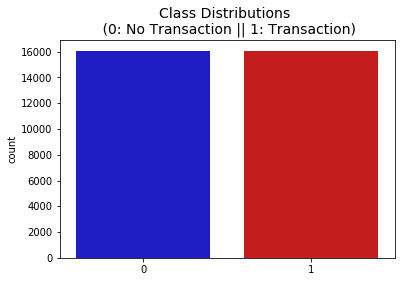

In [25]:
sns.countplot(ytrain_under, palette=colors)
plt.title('Class Distributions \n (0: No Transaction || 1: Transaction)', fontsize=14)

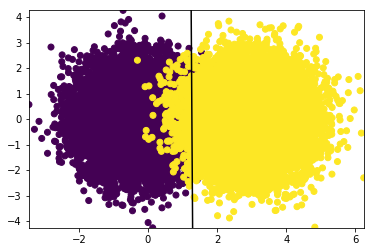

Accuaracy score of this sampling method 0.9807213930348259


In [37]:
samplecompare(Xtrain_under,Xtest_under,ytrain_under,ytest_under)

### Over-sample

In [27]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

Xtrain_over, ytrain_over = ros.fit_resample(Xtrain_pca, ytrain)

Xtest_over, ytest_over = ros.fit_resample(Xtest_pca, ytest)

Text(0.5, 1.0, 'Class Distributions \n (0: No Transaction || 1: Transaction)')

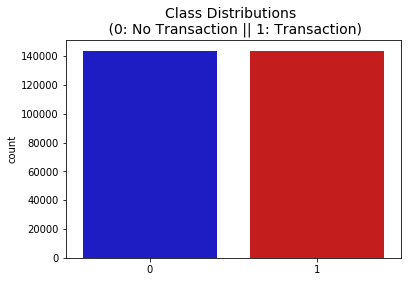

In [28]:
sns.countplot(ytrain_over, palette=colors)
plt.title('Class Distributions \n (0: No Transaction || 1: Transaction)', fontsize=14)

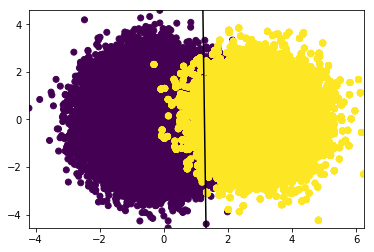

Accuaracy score of this sampling method 0.9790717065036131


In [29]:
samplecompare(Xtrain_over, Xtest_over,ytrain_over,ytest_over)

### Synthetic Minority Over-sampling TEchnique (SMOTE)

In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
Xtrain_sm, ytrain_sm = sm.fit_resample(Xtrain_pca, ytrain)
Xtest_sm, ytest_sm = sm.fit_resample(Xtest_pca, ytest)

Text(0.5, 1.0, 'Class Distributions \n (0: No Transaction || 1: Transaction)')

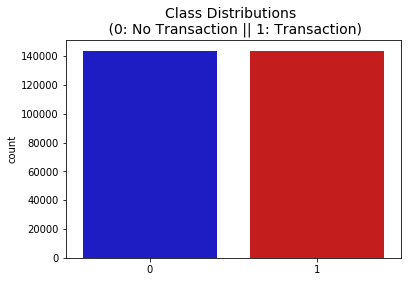

In [31]:
sns.countplot(ytrain_sm, palette=colors)
plt.title('Class Distributions \n (0: No Transaction || 1: Transaction)', fontsize=14)

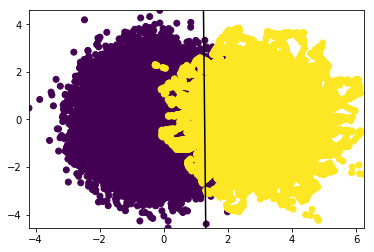

Accuaracy score of this sampling method 0.9801973318510283


In [32]:
samplecompare(Xtrain_sm,Xtest_sm,ytrain_sm,ytest_sm)

### Adaptive Synthetic sampling method (ADASYN)


In [33]:
from imblearn.over_sampling import ADASYN
adn=ADASYN(random_state=1)
Xtrain_ad, ytrain_ad = adn.fit_resample(Xtrain_pca, ytrain)
Xtest_ad, ytest_ad = adn.fit_resample(Xtest_pca, ytest)

Text(0.5, 1.0, 'Class Distributions \n (0: No Transaction || 1: Transaction)')

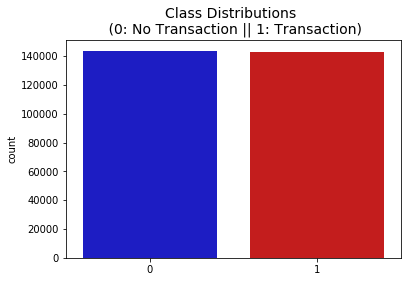

In [34]:
sns.countplot(ytrain_ad, palette=colors)
plt.title('Class Distributions \n (0: No Transaction || 1: Transaction)', fontsize=14)

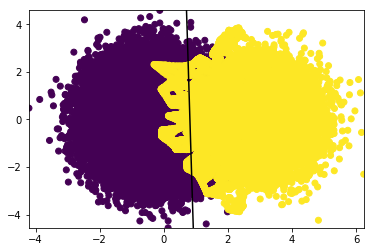

Accuaracy score of this sampling method 0.9347687267477373


In [35]:
samplecompare(Xtrain_ad,Xtest_ad,ytrain_ad,ytest_ad)

# Conclusion